###  CARGA DE LIBRERIAS


In [1]:
import missingno as mo
import pandas as pd
import os
from pathlib import Path
import numpy as np

### CARGA DE DATOS

In [2]:
ruta = Path("Datos") / "DatosOrginales" / "cancellation_data_for_mondragon_unibertsitatea_2024.csv"
df = pd.read_csv(ruta)

df.head()

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
0,"Nov 26, 2022, 16:10","Jan 1, 2023, 12:00","Jan 2, 2023, 12:00",36,1,January,Sunday,1,0,channel_manager,...,4,no,no,0,15.92,15.92,checked_out,NaN,NaN,NaN
1,"Dec 21, 2022, 17:27","Jan 1, 2023, 13:09","Jan 10, 2023, 12:00",11,9,January,Sunday,1,0,channel_manager,...,2,yes,no,0,117.78,13.09,checked_out,NaN,NaN,NaN
2,"Sep 21, 2022, 19:46","Jan 1, 2023, 15:00","Jan 7, 2023, 12:00",102,6,January,Sunday,2,4,channel_manager,...,1,no,yes,8,755.65,125.94,checked_out,NaN,NaN,NaN
3,"Sep 24, 2022, 12:09","Jan 1, 2023, 15:00","Jan 2, 2023, 12:00",99,1,January,Sunday,2,2,channel_manager,...,1,no,yes,1,186.37,186.37,checked_out,NaN,NaN,NaN
4,"Oct 18, 2022, 07:12","Jan 1, 2023, 15:00","Jan 2, 2023, 12:00",75,1,January,Sunday,4,0,channel_manager,...,1,no,no,0,77.02,77.02,checked_out,NaN,NaN,NaN


### DATA DISCOVERING

##### tipo de columnas

In [3]:
print(df.columns)
df.dtypes # hay que convertir las de date a tipo fecha y las numericas a numericos

Index(['booked_at', 'checkin_time', 'checkout_time', 'lead_time',
       'lenght_of_stay', 'checkin_month', 'checkin_day', 'adult_count',
       'child_count', 'origin', 'travel_agency_name', 'requested_category',
       'requested_category_name', 'asset', 'asset_type', 'brand',
       'asset_opening_date', 'available_units', 'business_segment', 'rate',
       'rate_group_name', 'rate_type', 'completed_entry_forms_count',
       'all_entry_forms_completed', 'last_entry_form_completed_at',
       'returning_inhabitant', 'recurrence', 'libere_community',
       'bought_products', 'product_count', 'reservation_net_value',
       'total_adr', 'status', 'cancelled_at', 'cancellation_reason',
       'cancellation_lead_time'],
      dtype='object')


booked_at                        object
checkin_time                     object
checkout_time                    object
lead_time                         int64
lenght_of_stay                    int64
checkin_month                    object
checkin_day                      object
adult_count                       int64
child_count                       int64
origin                           object
travel_agency_name               object
requested_category               object
requested_category_name          object
asset                            object
asset_type                       object
brand                            object
asset_opening_date               object
available_units                   int64
business_segment                 object
rate                             object
rate_group_name                  object
rate_type                        object
completed_entry_forms_count     float64
all_entry_forms_completed        object
last_entry_form_completed_at     object


In [4]:
df.columns

Index(['booked_at', 'checkin_time', 'checkout_time', 'lead_time',
       'lenght_of_stay', 'checkin_month', 'checkin_day', 'adult_count',
       'child_count', 'origin', 'travel_agency_name', 'requested_category',
       'requested_category_name', 'asset', 'asset_type', 'brand',
       'asset_opening_date', 'available_units', 'business_segment', 'rate',
       'rate_group_name', 'rate_type', 'completed_entry_forms_count',
       'all_entry_forms_completed', 'last_entry_form_completed_at',
       'returning_inhabitant', 'recurrence', 'libere_community',
       'bought_products', 'product_count', 'reservation_net_value',
       'total_adr', 'status', 'cancelled_at', 'cancellation_reason',
       'cancellation_lead_time'],
      dtype='object')

In [5]:
df.shape

(56448, 36)

### LIMPIEZA

### 1. CORRECCION TIPO DE COLUMNAS

In [6]:
columnas_fecha = ["booked_at", "checkin_time", "checkout_time",'asset_opening_date','last_entry_form_completed_at','cancelled_at']

for col in columnas_fecha:
    df[col] = pd.to_datetime(df[col], infer_datetime_format=True, errors="coerce")

df.head()

columnas_numericas = ['lenght_of_stay','adult_count','child_count','completed_entry_forms_count','product_count','total_adr','cancellation_lead_time']

for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')




C:\Users\maita\AppData\Local\Temp\ipykernel_70564\3046342318.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[col] = pd.to_datetime(df[col], infer_datetime_format=True, errors="coerce")
C:\Users\maita\AppData\Local\Temp\ipykernel_70564\3046342318.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], infer_datetime_format=True, errors="coerce")
C:\Users\maita\AppData\Local\Temp\ipykernel_70564\3046342318.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-c

### 2. DUPLICADOS

In [7]:
df.duplicated().sum()

np.int64(2306)

In [8]:
df[df.duplicated] # hay registros que son exactamente iguales y no es posible que coincida con la misma reserva porque han reservado exactamente en la misma hora. 
# Ademas, no hay solo dos filas duplicadas sino que se repite la fila mas de una vez. Por eso nos vamos a quedar solo con el primer registro


,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
63,2023-01-01 21:49:00,2023-01-02 15:00:00,2023-01-03 12:00:00,1,1,January,Monday,1,0,channel_manager,...,1,no,yes,1,25.16,25.16,cancelled,2023-01-02 21:21:00,refuse_to_detail,0.0
65,2023-01-01 21:49:00,2023-01-02 15:00:00,2023-01-03 12:00:00,1,1,January,Monday,1,0,channel_manager,...,1,no,yes,1,25.16,25.16,cancelled,2023-01-02 21:21:00,refuse_to_detail,0.0
66,2023-01-01 21:49:00,2023-01-02 15:00:00,2023-01-03 12:00:00,1,1,January,Monday,1,0,channel_manager,...,1,no,no,0,21.07,21.07,cancelled,2023-01-02 21:21:00,refuse_to_detail,0.0
83,2022-09-05 10:20:00,2023-01-04 15:00:00,2023-01-07 12:00:00,121,3,January,Wednesday,4,0,email,...,1,no,yes,4,274.53,91.51,checked_out,NaT,NaN,NaN
85,2022-09-05 10:20:00,2023-01-04 15:00:00,2023-01-07 12:00:00,121,3,January,Wednesday,3,0,email,...,1,no,yes,4,251.34,83.78,checked_out,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56142,2023-03-01 15:35:00,2023-11-22 15:00:00,2023-11-23 11:00:00,266,1,November,Wednesday,4,0,channel_manager,...,1,no,yes,1,154.76,154.76,cancelled,2023-03-01 15:49:00,refuse_to_detail,0.0
56143,2023-03-01 15:35:00,2023-11-22 15:00:00,2023-11-23 11:00:00,266,1,November,Wednesday,4,0,channel_manager,...,1,no,yes,1,154.76,154.76,cancelled,2023-03-01 15:49:00,refuse_to_detail,0.0
56144,2023-03-01 15:35:00,2023-11-22 15:00:00,2023-11-23 11:00:00,266,1,November,Wednesday,4,0,channel_manager,...,1,no,no,0,141.38,141.38,cancelled,2023-03-01 15:49:00,refuse_to_detail,0.0
56181,2023-03-03 19:39:00,2023-11-23 15:00:00,2023-11-25 11:00:00,265,2,November,Thursday,2,0,channel_manager,...,1,no,no,0,430.79,215.40,cancelled,2023-11-15 21:13:00,changed_plans,257.0


In [7]:
df = df.drop_duplicates() # quitamos duplicados
print(df.shape)

(54142, 36)


### 3. ANALISIS DE NA'S

In [ ]:
df.isna().sum() # missings en las columnas: travel_agency, completed_entry_forms,last_entry_form, total_adr, cancelled_at, cancellation_reason, cancellation_lead_time


booked_at                           0
checkin_time                        0
checkout_time                       0
lead_time                           0
lenght_of_stay                      0
checkin_month                       0
checkin_day                         0
adult_count                         0
child_count                         0
origin                              0
travel_agency_name              16533
requested_category                  0
requested_category_name             0
asset                               0
asset_type                          0
brand                               0
asset_opening_date                  0
available_units                     0
business_segment                    0
rate                                0
rate_group_name                     0
rate_type                           0
completed_entry_forms_count      1961
all_entry_forms_completed           0
last_entry_form_completed_at    13658
returning_inhabitant                0
recurrence  

<Axes: >

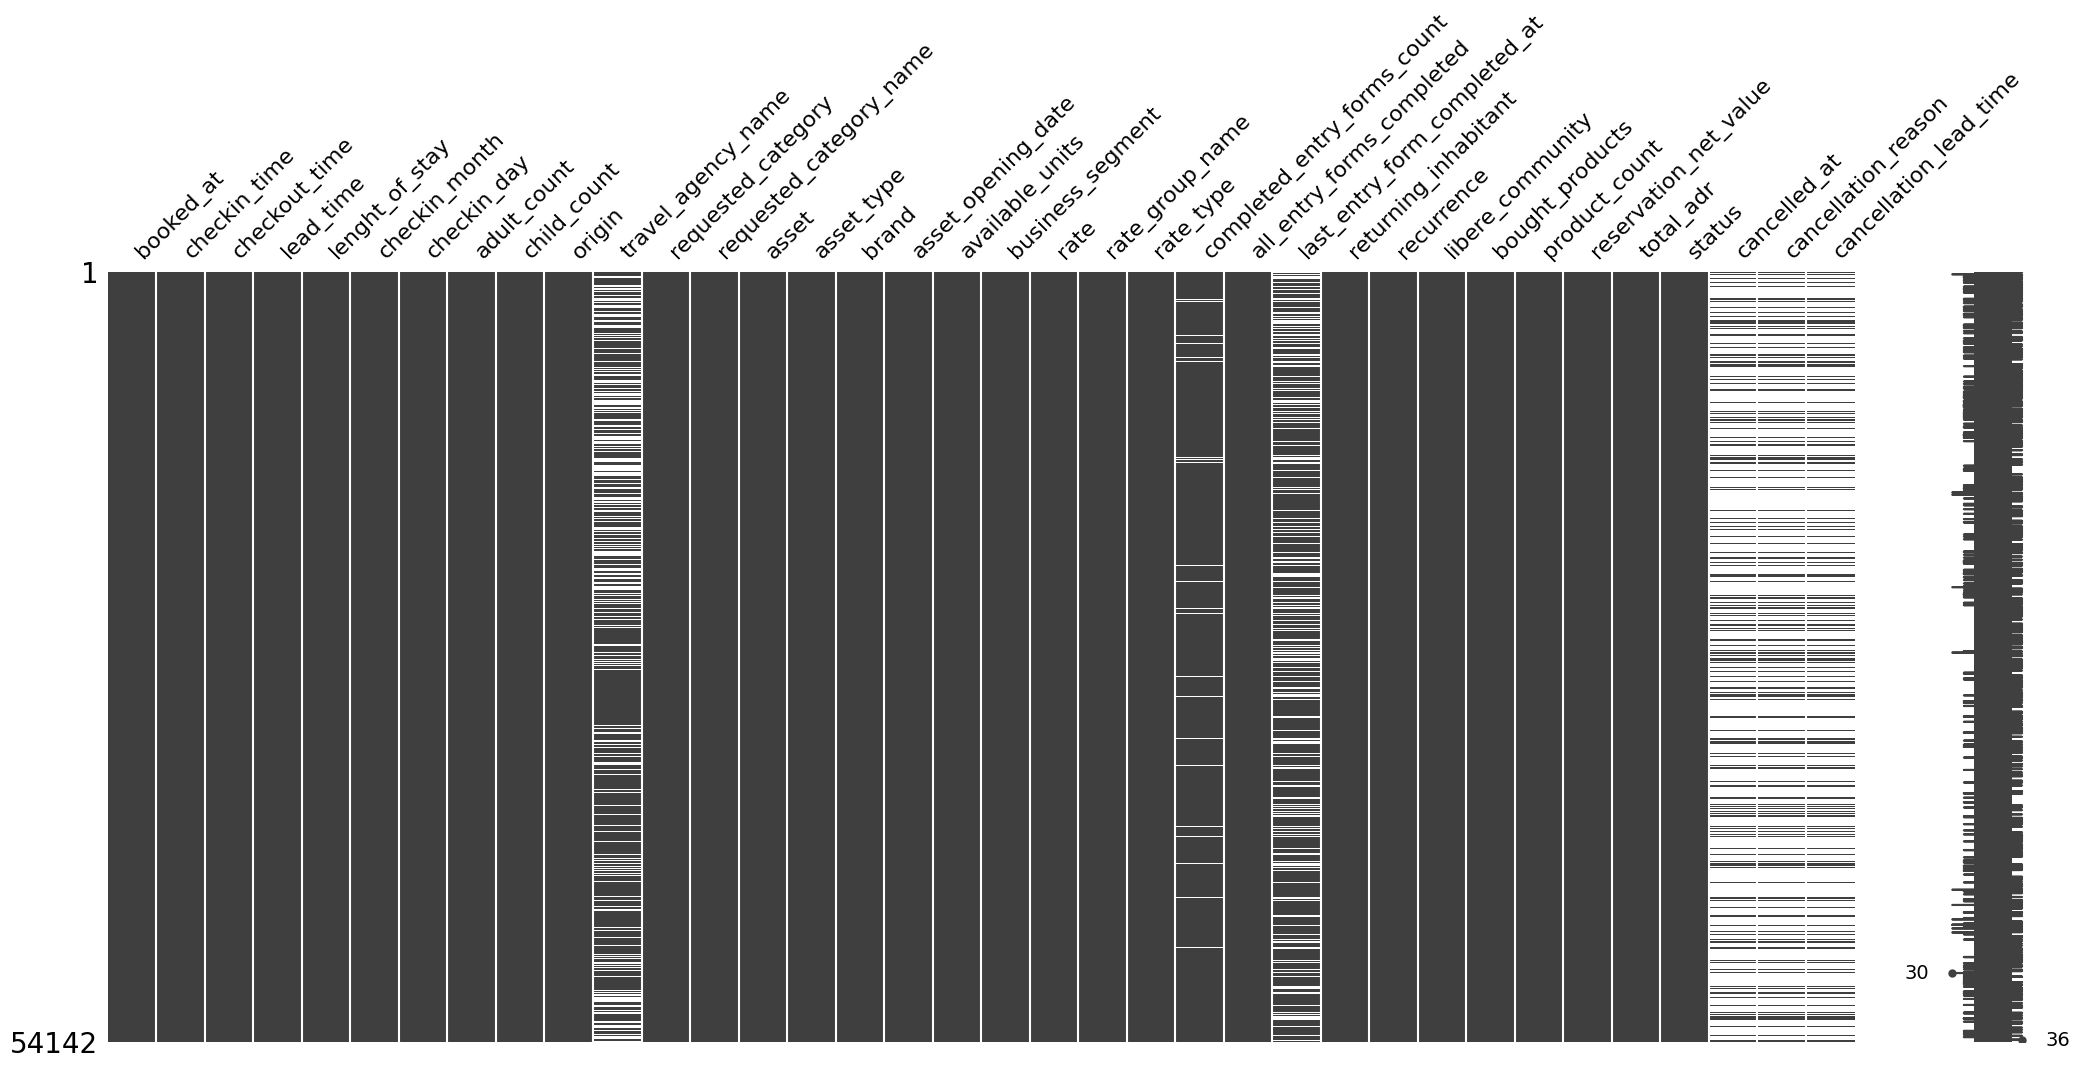

In [9]:
mo.matrix(df) # las columnas de cancelación estan correlacionadas, es decir, si un registro tiene un valor ausente en cancelled_at también lo tienen en cancellation_reason y cancellation_lead_time
# las demas columnas en un principio no estan correlacionadas

<Axes: >

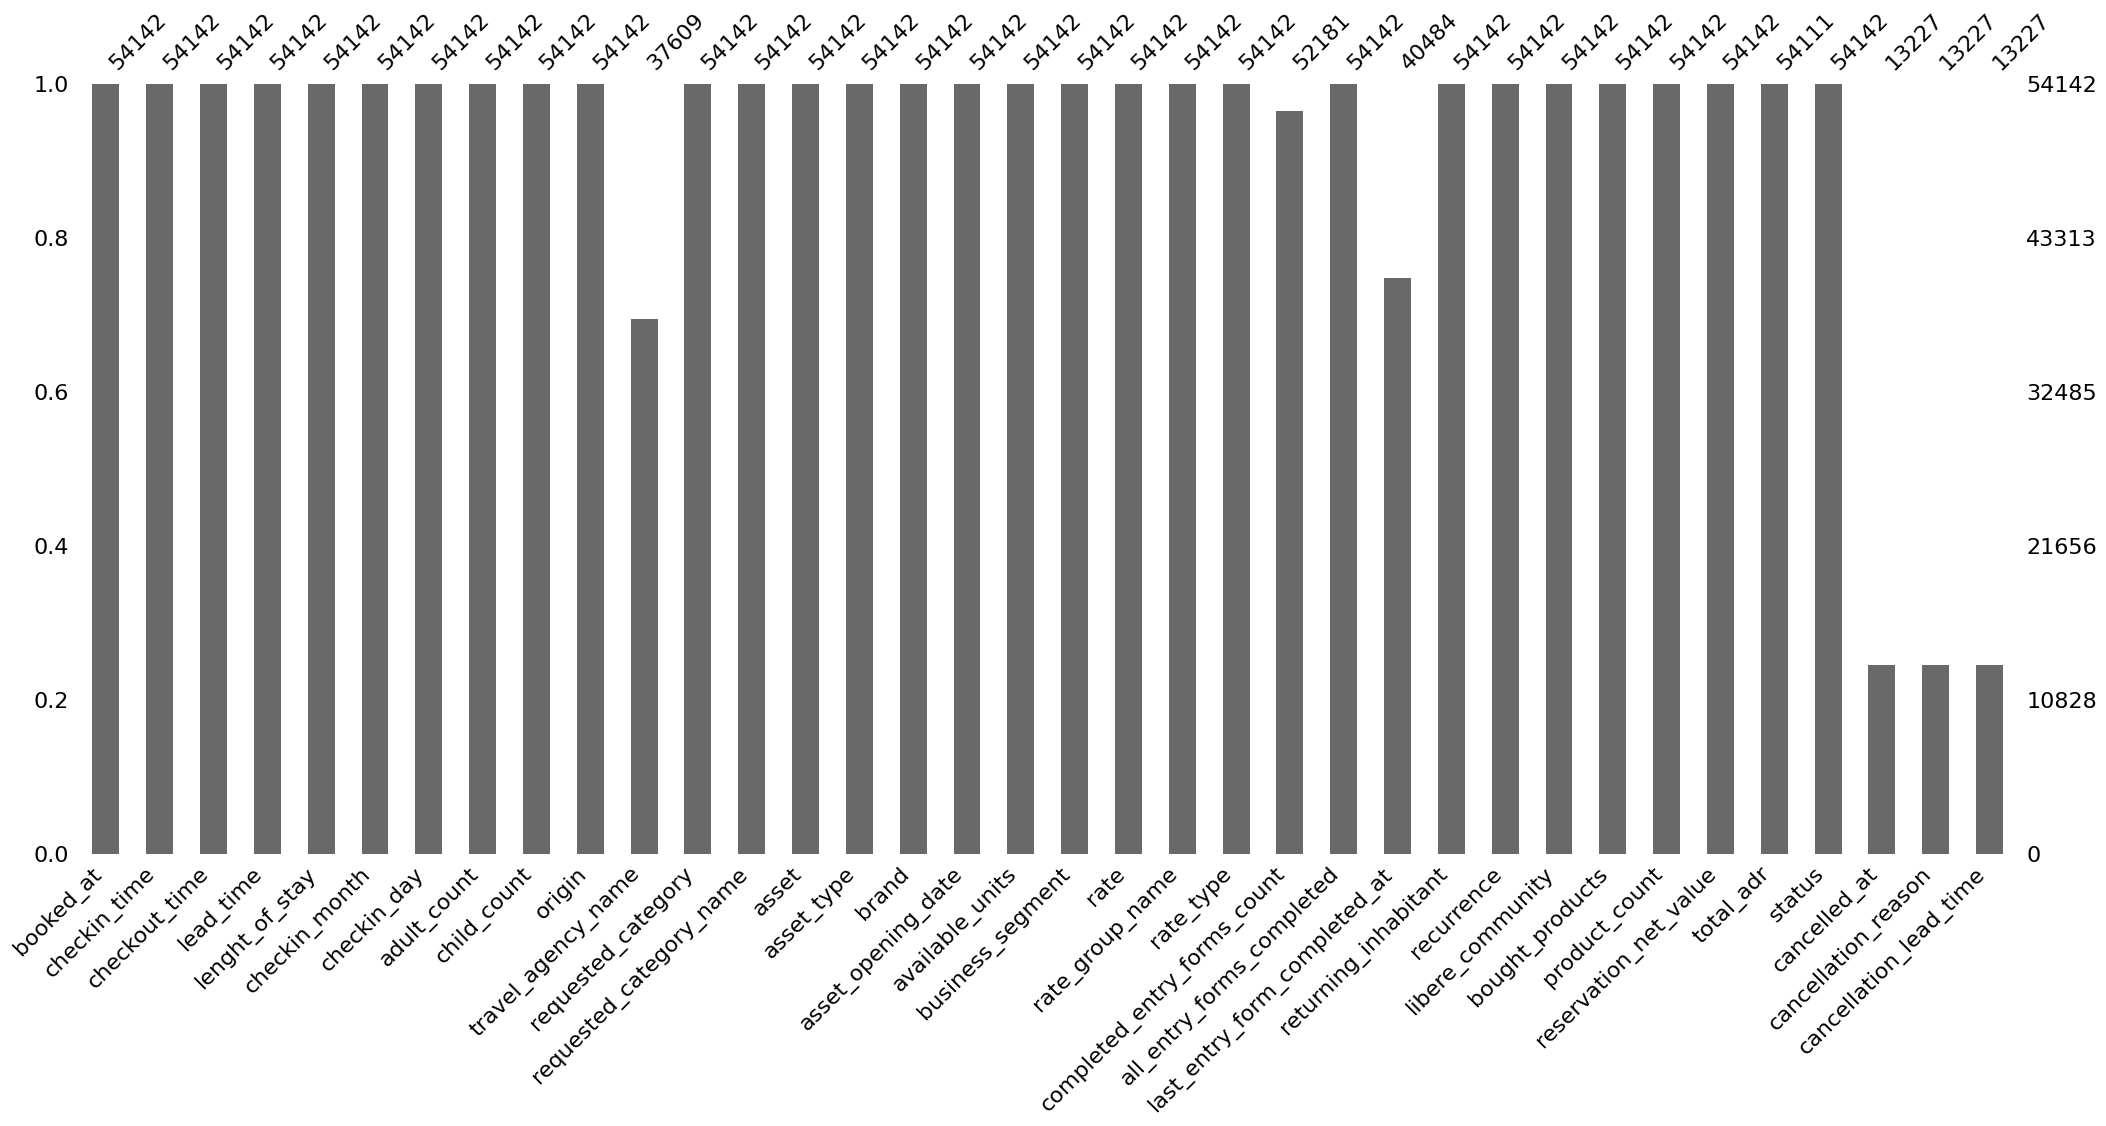

In [12]:
mo.bar(df)

## 4. IMPUTACIÓN DE VALORES AUSENTES: 
 travel_agency,  completed_entry_forms, last_entry_form, cancelled_at, cancellation_reason, cancellation_lead_time

### travel agency name

In [10]:
df['travel_agency_name'] # si la reserva no se ha hecho por agencia, es NA --> IMPUTAMOS PONIENDO "RESERVA SIN AGENCIA"
df['travel_agency_name'] = df['travel_agency_name'].fillna('Reserva sin agencia') 

In [11]:
df['travel_agency_name'].isna().sum() # no hay ningun NA

np.int64(0)

### completed entry forms 

In [12]:
# la columna 'all entry forms' la cual indica si se han completado formularios de check in, esta relacionada con la columna 
# 'completed entry forms count', que indica cuantos formularios se han rellenado.  Si la columna 'all entry forms' es yes
# la columna 'completed entry forms count' debe de ser un numero mayor que uno (ha completado mas de un formulario)

# por eso si all entry forms es no imputamos completed entry forms con 0 (ya que 'all_entry_forms' no tiene ningun valor missing)

df.loc[df['all_entry_forms_completed']== 'no', 'completed_entry_forms_count'] = 0
print(df['completed_entry_forms_count'].isna().sum())




0


##### verificar que si la cantidad de formularios completados es mayor que 0, la columna de 'all entry forms es yes'

In [13]:
# mirar si hay alguna fila que es mayor que uno en completed entry forms count y que luego en all entry forms count es 'no' --> si hay cambiarlo a 'yes'
df.loc[df['completed_entry_forms_count']>0,'all_entry_forms_completed'] = 'yes'

df[(df['completed_entry_forms_count']>0) & (df['all_entry_forms_completed']== 'no')] # se han corregido las filas incorrectas




,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time


### cancellation reason, cancelation lead time 

In [14]:
# los que son NA es porque no han cancelado (se ha mirado si podria ser que se haya cancelado pero no se haya dado informacion para poder imputarlo de 
# otra forma pero si se ha cancelado y no hay informacion del porqué pone: refuse to detail. También se ha mirado si restando el momento de check in por el dia de cancelacion 
# se podria obtener cancellation lead time pero todas estan hechas, es decir no faltan valores para calcular)
df['cancellation_reason'] = df['cancellation_reason'].fillna('not cancelled')

df['cancellation_lead_time'] = df['cancellation_lead_time'].fillna(0)



### total_adr_ relacionada con RESERVATION_NET_VALUE 

In [ ]:
df.loc[df['total_adr'].isna(),['total_adr','reservation_net_value']] # hay reservas en los que el valor es negativo o 0, QUE HACEMOS???

,total_adr,reservation_net_value
174,NaN,"2,768.82"
1523,NaN,"-5,503.86"
10450,NaN,"2,425.08"
16932,NaN,"1,367.29"
17057,NaN,"1,334.51"
17098,NaN,"2,029.12"
19203,NaN,"1,651.03"
20100,NaN,"1,132.21"
20254,NaN,"-6,220.41"
23009,NaN,0


## NUEVAS COLUMNAS A PARTIR DE COLUMNAS DE FECHA O PARA UTILIZAR EN EL CLUSTERING/MODELADO

### Last entry forms completed at

### Esta columna indica el momento en el que se ha rellenado el último formulario. No obstante, para los modelos o el clustering no nos interesa que las columnas sean de tipo fecha porque no nos aportan información. Además hay valores ausentes en esta columna. 
Por eso, se ha decidido hacer una nueva columna que indique si el ultimo check-in ha sido realizado antes de la estancia (considerando el primer dia de la estancia también, es decir, si se ha hecho el check-in el primer dia o antes), durante la estancia (desde el segundo hasta el ultimo dia, ultimo día sin incluir) o después de la estancia (incluido el ultimo dia). De esta manera, obtenemos una columna categorica que sí nos aporte informacion y la podamos utilizar para el clustering o modelos predictivos

In [19]:
print((df['last_entry_form_completed_at'].isna() == df['cancellation_reason'].isna()).sum()) # esto es normal porque los que han cancelado, no han completado ningun formulario
df['last_entry_form_completed_at'].isna().sum() # hay mas valores missing de los que deberia, porque hay registros en los que la reserva
# no ha sido cancelada pero que no se sabe cuando ha sido completada ese formulario, por ello vamos a crear una nueva columna a partir de esta

# por ahora lo imputamos con null
df['last_entry_form_completed_at'].fillna(np.nan)

40484


0       2022-12-31 10:42:00
1       2022-12-21 17:30:00
2       2022-12-30 14:16:00
3       2022-09-24 13:10:00
4       2022-11-11 11:55:00
                ...        
56443   2023-12-30 08:58:00
56444   2023-12-30 13:04:00
56445   2023-12-28 18:29:00
56446   2023-12-28 18:34:00
56447   2023-12-30 08:23:00
Name: last_entry_form_completed_at, Length: 54142, dtype: datetime64[ns]

### NUEVA COLUMNA: MOMENTO CHECK IN ANTES, DURANTE Y DESPUÉS

In [ ]:
# Para poder sacar informacion sobre el check-in vamos a hacer una columna que indique si el ultimo chek-in se ha realizado antes, durante o después de la estancia
# vamos a considerar antes: primer dia de estancia o antes
# durante: desde el segundo hata el ultimo dia de check in, ultimo dia sin incluir
# después: último día de estancia + después
df = df.reset_index(drop=True) # para que no de problemas

condiciones = [
    df['last_entry_form_completed_at'] < df['checkin_time'],
    (df['last_entry_form_completed_at'] > df['checkin_time']) &
    (df['last_entry_form_completed_at'] < df['checkout_time']),
    df['last_entry_form_completed_at'] >= df['checkout_time']
]

valores = ['antes', 'durante', 'después']

df['momento_checkin'] = np.select(condiciones, valores)


# ahora ya hemos sacado informacion de la fecha del ultimo formulario convertiendola en categorica para poder utilizarlo en el clustering
# y podemos eliminar esta columna
df = df.drop(columns=['last_entry_form_completed_at'])

df['momento_checkin']


C:\Users\maita\AppData\Local\Temp\ipykernel_70564\3149082160.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'antes' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'momento_checkin'] = 'antes'


0        antes
1        antes
2        antes
3        antes
4        antes
         ...  
54137    antes
54138    antes
54139    antes
54140    antes
54141    antes
Name: momento_checkin, Length: 54142, dtype: object

#### NUEVA COLUMNA DE RATIO DE FORMULARIOS COMPLETADOS POR PERSONAS EN LA RESERVA: NUMERO FORMULARIOS / NUMERO PERSONAS RESERVA

In [21]:
df['ratio_asistencia'] = df['completed_entry_forms_count'] / (df['adult_count'] + df['child_count'])
# hacer grafico filtrando por la gente que ha reservado, agruparlo por ciudad y calcular la media de ratios

#### NUEVA COLUMNA DE RATIOS DE CANCELACIÓN UTILIZANDO CANCELLED AT


###### CANCELACIONES DE LA ESTANCIA DE ESE MES/RESERVAS DE ESE MES. Luego, hacemos una columna categorica de zona roja/zona verde que indique si la cancelacion se ha realizado en una zona que se suelen hacer más cancelaciones o zona verde que es cuando la gente normalmente no suele cancelar


In [22]:
# el ratio lo calculamos asi: 
    # 1. Utilizar la columna de checkin month. Si la reserva empieza el 30 de enero y es hasta el 2 de diciembre se considerara como que la reserva es de diciembre)
    # 2. Sacar la columna booleana de cancelacion (si o no)
    # 3. Agrupar por el mes de reserva y contar por cada mes la cantidad de reservas
    # 4. Filtrar el data frame por las reservas que se han cancelado y agrupandolo por mes calcular la cantidad de cancelaciones por mes
    # 5. Sacar la columna del ratio

# sacar la columna de cancelacion 
df.loc[df['cancellation_reason'] == 'not cancelled', 'ha cancelado'] = False
df.loc[df['cancellation_reason'] != 'not cancelled', 'ha cancelado'] = True

# agrupar por el mes de reserva y contar por cada mes la cantidad de reservas
agrupacion_reservas_mes = df.value_counts('checkin_month')
print(agrupacion_reservas_mes)

# filtrar por las cancelaciones
df_cancelaciones = df[df['ha cancelado'] == True]

# agrupar y calcular numero de cancelaciones por mes
agrupacion_cancelaciones_mes = df_cancelaciones.value_counts('checkin_month')
print(agrupacion_cancelaciones_mes)

# sacar la columna de ratio 
ratio = (agrupacion_reservas_mes/agrupacion_cancelaciones_mes).sort_values(ascending=False)
ratio[ratio > ratio.mean()] 
# Para definir la zona roja se planteó usar como criterio los meses cuyo ratio fuera mayor que la media.
# Sin embargo, aunque noviembre tiene un ratio de 4.10 —superior a la media— es el único mes que se aleja del grupo de meses con ratios claramente más altos (entre 4.14 y 4.45).
# Debido a este salto, se decidió considerar como zona roja únicamente los meses con un ratio superior a 4.14

# Creamos la columna de zona roja/zona verde
df['ratiratio_cancelaciones_mes_respecto_reservaso'] = df['checkin_month'].map(ratio)
df['zona_roj_verd_cancelaciones'] = np.where(df['ratiratio_cancelaciones_mes_respecto_reservaso'] > 4.14, 'roja', 'verde')



checkin_month
August       5655
July         5244
September    5216
April        5152
May          5131
June         5034
October      4400
December     3780
March        3705
November     3693
February     3598
January      3534
Name: count, dtype: int64
checkin_month
August       1362
May          1302
June         1300
July         1263
September    1258
April        1156
October      1048
March         937
February      907
December      907
November      899
January       888
Name: count, dtype: int64


In [23]:
# verificamos
print(df[['checkin_month','ratiratio_cancelaciones_mes_respecto_reservaso', 'zona_roj_verd_cancelaciones']].head())
df[['checkin_month','ratiratio_cancelaciones_mes_respecto_reservaso', 'zona_roj_verd_cancelaciones']].tail()


  checkin_month  ratiratio_cancelaciones_mes_respecto_reservaso  \
0       January                                         3.97973   
1       January                                         3.97973   
2       January                                         3.97973   
3       January                                         3.97973   
4       January                                         3.97973   

  zona_roj_verd_cancelaciones  
0                       verde  
1                       verde  
2                       verde  
3                       verde  
4                       verde  


,checkin_month,ratiratio_cancelaciones_mes_respecto_reservaso,zona_roj_verd_cancelaciones
54137,December,4.167585,roja
54138,December,4.167585,roja
54139,December,4.167585,roja
54140,December,4.167585,roja
54141,December,4.167585,roja


In [24]:
# ahora ya podemos quitar la columna de cancelled_at porque hemos obtenido informacion de esta columna y al ser de tipo fecha, no nos aporta información
df = df.drop(columns=['cancelled_at'])


### NUEVA COLUMNA : Estacion de la reserva
Columna de estacion del año de la reserva

In [35]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'invierno'
    elif month in [3, 4, 5]:
        return 'primavera'
    elif month in [6, 7, 8]:
        return 'verano'
    else:
        return 'otoño'

df['estacion'] = df['checkin_month'].apply(get_season)


### NUEVA COLUMNA: Ciudad del hotel/apartamento

In [37]:
# KOISI HOTEL = DONOSTIA, SAN SEBASTIAN
df['asset'].unique()

array(['Koisi Hostel', 'Líbere Vitoria', 'Líbere Bilbao Museo',
       'Líbere Bilbao La Vieja', 'Líbere Valencia Abastos',
       'Líbere Valencia Jardín Botánico', 'Líbere Madrid Palacio Real',
       'Líbere Málaga Teatro Romano', 'Líbere Granada Catedral',
       'Líbere Málaga la Merced', 'Líbere Córdoba Patio Santa Marta',
       'Líbere Pamplona Yamaguchi'], dtype=object)

In [38]:
mapeo_ciudades = {
    'Koisi Hostel': 'Donostia',
    'Líbere Vitoria': 'Vitoria',
    'Líbere Bilbao Museo': 'Bilbao',
    'Líbere Bilbao La Vieja': 'Bilbao',
    'Líbere Valencia Abastos': 'Valencia',
    'Líbere Valencia Jardín Botánico': 'Valencia',
    'Líbere Madrid Palacio Real': 'Madrid',
    'Líbere Málaga Teatro Romano': 'Málaga',
    'Líbere Granada Catedral': 'Granada',
    'Líbere Málaga la Merced': 'Málaga',
    'Líbere Córdoba Patio Santa Marta': 'Córdoba',
    'Líbere Pamplona Yamaguchi': 'Pamplona'
}
df['city'] = df['asset'].map(mapeo_ciudades)

### verificamos que el df no tenga ningun missing

In [39]:
df.isna().sum() #todo bien imputado y columnas nuevas creadas

booked_at                                          0
checkin_time                                       0
checkout_time                                      0
lead_time                                          0
lenght_of_stay                                     0
checkin_month                                      0
checkin_day                                        0
adult_count                                        0
child_count                                        0
origin                                             0
travel_agency_name                                 0
requested_category                                 0
requested_category_name                            0
asset                                              0
asset_type                                         0
brand                                              0
asset_opening_date                                 0
available_units                                    0
business_segment                              

### miramos duplicados tras imputación

In [40]:
print(df.duplicated().sum()) # se han creado filas duplicadas --> eliminamos
print(df[df.duplicated])
df = df.drop_duplicates()
df.shape

0
Empty DataFrame
Columns: [booked_at, checkin_time, checkout_time, lead_time, lenght_of_stay, checkin_month, checkin_day, adult_count, child_count, origin, travel_agency_name, requested_category, requested_category_name, asset, asset_type, brand, asset_opening_date, available_units, business_segment, rate, rate_group_name, rate_type, completed_entry_forms_count, all_entry_forms_completed, returning_inhabitant, recurrence, libere_community, bought_products, product_count, reservation_net_value, total_adr, status, cancellation_reason, cancellation_lead_time, momento_checkin, ratio_asistencia, ha cancelado, ratiratio_cancelaciones_mes_respecto_reservaso, zona_roj_verd_cancelaciones, estacion, city]
Index: []

[0 rows x 41 columns]


(52179, 41)

<Axes: >

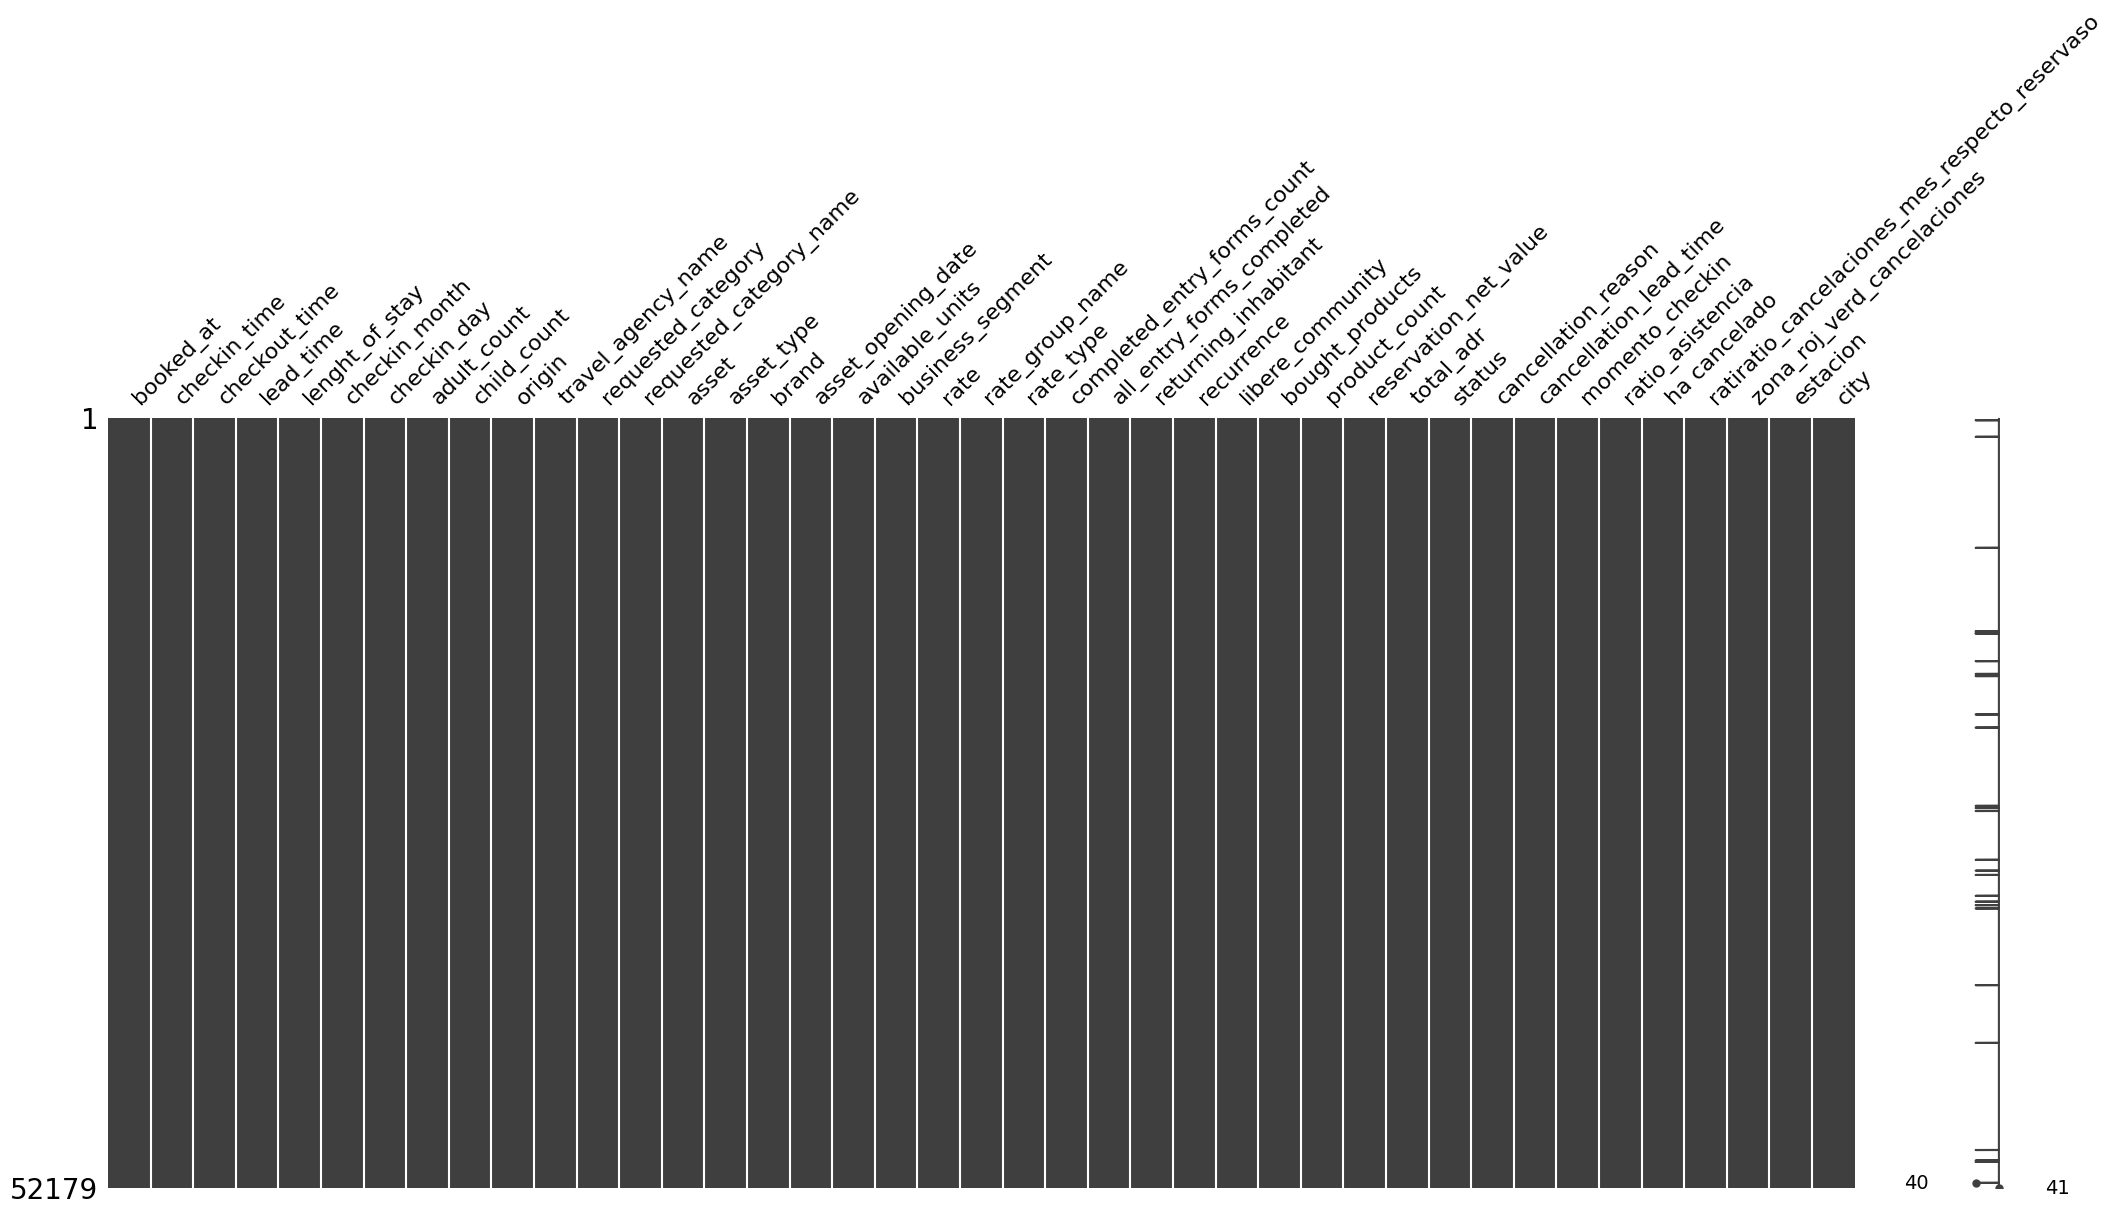

In [41]:
mo.matrix(df)

### GUARDAMOS EL DF LIMPIO Y CON LAS NUEVAS COLUMNAS CREADAS

In [44]:
df.to_csv("Datos/DatosTransformados/df_limpio.csv", index=False)
